# MAC0417/5768 - Visão e Processamento de Imagens (2021)

Exercício Programa 2.2 - Normalização e análise da variação das classes

Gabriela Melo e Richard Block

Projeto GitHub: https://github.com/gabi-melo/image_processing

Base de imagens: https://www.kaggle.com/gabrielamelo/image-processing

In [120]:
# importar bibliotecas
import skimage
from skimage import io
from skimage import color
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
from PIL import Image
import PIL.ExifTags
import pandas as pd

**Explicação e comentários sobre as análises**:

A "normalização" das imagens é realizada por meio da equalização de histograma. Esta função faz com que os valores de pixels mais frequentes nas imagens sejam "espalhados" mais uniformemente no intervalo de valores possíveis. O resultado é uma imagem com maior contraste global.
Usa-se a função de distribuição cumulativa como "mapping" para reescalar os pixels.

1. **Protótipo médio de cada classe**:
    Soma-se todas imagens de uma classe, todas as variações, e divide-se pelo número de imagens, para criar uma imagem que representa a imagem média da classe.
    
2. **Histograma médio de cada classe**:
    O histograma representa a distribuição dos valores do pixels de uma imagem. Calculando o histograma médio, temos uma medida de distribuição dos valores por classe. O histograma médio nos permite comparar as transformações aplicadas aos Datasets e avaliar o nível de variação aplicado.
    
3. **Variância do histograma de cada classe**:
    A variância é uma medida de dispersão de valores dos pixels das imagens, calculada com base nos histogramas. A hipótese é de que o augmentedDataSet apresenta a maior variância, é com esse objetivo que o criamos.

In [121]:
## funções

# criar função para converter grayscale de 0,1(float) para 0,255(int) para usar a biblioteca PIL
def change_to_255(arr): 
    return np.uint8(arr*255)

# criar função para converter array grayscale 2D em imagem da biblioteca PIL
def im_from_float_array(arr):
    return Image.fromarray(change_to_255(arr), 'L')

**Equalização de histogramas**:

In [ ]:
# criar diretório para o dataset normalizado
os.mkdir("/Users/gabimelo/Desktop/EP2/normalizedDataset")

In [122]:
## equalização dos histogramas da imagens para o método de níveis de cinza 

# selecionar todos as imagens em níveis de cinza (originalGrayDataSet)
for path in glob("/Users/gabimelo/Desktop/EP2/originalGrayDataSet/*_gray.jpg"):
    print(path)   
    
    # carregar imagem do augmentedDataSet
    img = Image.open(path)   
    
    # aplicar equalização do histograma da imagem
    img_eqhist = im_from_float_array( exposure.equalize_hist(np.array(img), nbins=256) )
    
    # definir novo nome da imagem normalizada
    old_name = path.split("/")[-1].replace(".jpg","")
    norm_name = old_name + "_" + "norm" + ".jpg"
    print(norm_name)
    
    # salvar imagem no normalizedDataset
    img_eqhist.save("/Users/gabimelo/Desktop/EP2/normalizedDataset/" + norm_name)

/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_1_noite_fora_bege_1_gray.jpg
escova_1_noite_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_dentro_pano_2_gray.jpg
livro_1_dia_dentro_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_1_dia_fora_madeira_2_gray.jpg
leite_1_dia_fora_madeira_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_1_dia_fora_madeira_3_gray.jpg
leite_1_dia_fora_madeira_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_dentro_pano_3_gray.jpg
livro_1_dia_dentro_pano_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_dentro_laranja_3_gray.jpg
chinelo_1_dia_dentro_laranja_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_3_noite_dentro_madeira_2_gray.jpg
livro_3_noite_dentro_madeira_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_dentro_laranja_2_gray.jpg
chinelo_1_dia_dentro_lara

palheta_3_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_noite_dentro_laranja_1_gray.jpg
oculos_1_noite_dentro_laranja_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_dia_fora_bege_1_gray.jpg
escova_3_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_fora_bege_1_gray.jpg
tesoura_3_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_2_dia_dentro_pano_3_gray.jpg
chave_2_dia_dentro_pano_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_dentro_palha_1_gray.jpg
livro_1_dia_dentro_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_noite_fora_vermelho_1_gray.jpg
palheta_3_noite_fora_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_2_dia_dentro_pano_2_gray.jpg
chave_2_dia_dentro_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_noite_fora_azu

livro_2_dia_dentro_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_2_noite_dentro_verde_1_gray.jpg
tesoura_2_noite_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_3_dia_fora_bege_2_gray.jpg
chinelo_3_dia_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_noite_fora_bege_2_gray.jpg
escova_2_noite_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_1_dia_dentro_verde_1_gray.jpg
palheta_1_dia_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_noite_fora_bege_3_gray.jpg
escova_2_noite_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_3_dia_dentro_vermelho_2_gray.jpg
oculos_3_dia_dentro_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_1_noite_dentro_verde_3_gray.jpg
escova_1_noite_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_3_dia_

oculos_3_dia_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_3_dia_fora_palha_3_gray.jpg
leite_3_dia_fora_palha_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_3_dia_fora_bege_3_gray.jpg
oculos_3_dia_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_1_noite_dentro_vermelho_2_gray.jpg
escova_1_noite_dentro_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_dia_dentro_laranja_1_gray.jpg
tesoura_1_dia_dentro_laranja_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_noite_fora_bege_3_gray.jpg
oculos_1_noite_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_noite_fora_bege_2_gray.jpg
oculos_1_noite_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_2_dia_dentro_palha_2_gray.jpg
leite_2_dia_dentro_palha_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_dia_dentro_verme

tesoura_2_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_dia_fora_vermelho_2_gray.jpg
tesoura_1_dia_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_3_noite_dentro_palha_1_gray.jpg
copo_3_noite_dentro_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_dentro_verde_2_gray.jpg
chinelo_1_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_dentro_verde_3_gray.jpg
chinelo_1_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_noite_dentro_verde_1_gray.jpg
tesoura_3_noite_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_2_dia_fora_bege_2_gray.jpg
oculos_2_dia_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_2_dia_fora_bege_3_gray.jpg
oculos_2_dia_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_dia_fora_

/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_dia_fora_vermelho_1_gray.jpg
palheta_3_dia_fora_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_dentro_vermelho_3_gray.jpg
tesoura_3_dia_dentro_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_3_noite_fora_madeira_2_gray.jpg
copo_3_noite_fora_madeira_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_3_noite_fora_madeira_3_gray.jpg
copo_3_noite_fora_madeira_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_dentro_vermelho_2_gray.jpg
tesoura_3_dia_dentro_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_2_noite_dentro_verde_3_gray.jpg
palheta_2_noite_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_2_noite_dentro_verde_2_gray.jpg
palheta_2_noite_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_noite_dentro_laranja_

palheta_2_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_2_dia_dentro_verde_3_gray.jpg
palheta_2_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_dia_dentro_verde_2_gray.jpg
escova_3_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_2_dia_dentro_madeira_1_gray.jpg
leite_2_dia_dentro_madeira_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/caneta_1_noite_dentro_palha_1_gray.jpg
caneta_1_noite_dentro_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_fora_madeira_2_gray.jpg
livro_1_dia_fora_madeira_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_3_dia_fora_pano_2_gray.jpg
chave_3_dia_fora_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/caneta_2_dia_fora_palha_1_gray.jpg
caneta_2_dia_fora_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_fora_madeira_3

escova_3_dia_dentro_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_dia_dentro_laranja_2_gray.jpg
escova_3_dia_dentro_laranja_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_1_noite_dentro_pano_1_gray.jpg
copo_1_noite_dentro_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_dentro_verde_2_gray.jpg
tesoura_3_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_dentro_verde_3_gray.jpg
tesoura_3_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_3_noite_dentro_madeira_3_gray.jpg
leite_3_noite_dentro_madeira_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_fora_bege_1_gray.jpg
chinelo_1_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_1_dia_dentro_palha_1_gray.jpg
chave_1_dia_dentro_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_3_noit

chinelo_1_dia_fora_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_fora_vermelho_2_gray.jpg
chinelo_1_dia_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_1_noite_dentro_vermelho_3_gray.jpg
palheta_1_noite_dentro_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_2_dia_dentro_pano_1_gray.jpg
copo_2_dia_dentro_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_dia_fora_bege_1_gray.jpg
escova_2_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_2_dia_fora_bege_1_gray.jpg
tesoura_2_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_noite_fora_pano_2_gray.jpg
livro_1_noite_fora_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_noite_fora_pano_3_gray.jpg
livro_1_noite_fora_pano_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_noite_dentro_verm

palheta_2_noite_fora_azul_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_dia_dentro_verde_1_gray.jpg
chinelo_1_dia_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_dia_fora_vermelho_2_gray.jpg
escova_2_dia_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_dia_fora_vermelho_3_gray.jpg
escova_2_dia_fora_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_dia_fora_vermelho_1_gray.jpg
tesoura_1_dia_fora_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_2_dia_dentro_verde_1_gray.jpg
tesoura_2_dia_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_3_noite_dentro_palha_3_gray.jpg
copo_3_noite_dentro_palha_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_3_noite_dentro_palha_2_gray.jpg
copo_3_noite_dentro_palha_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_1

/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_2_dia_dentro_pano_1_gray.jpg
chave_2_dia_dentro_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_1_dia_dentro_palha_2_gray.jpg
livro_1_dia_dentro_palha_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_noite_fora_vermelho_2_gray.jpg
palheta_3_noite_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/caneta_1_noite_fora_madeira_1_gray.jpg
caneta_1_noite_fora_madeira_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_noite_fora_azul_2_gray.jpg
tesoura_1_noite_fora_azul_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_1_noite_fora_azul_3_gray.jpg
tesoura_1_noite_fora_azul_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_dia_fora_bege_3_gray.jpg
tesoura_3_dia_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_dia_fora_bege_2_gray.jpg
escova_3_dia_fora_bege_2_gr

/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_2_dia_dentro_pano_3_gray.jpg
livro_2_dia_dentro_pano_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_2_noite_dentro_verde_2_gray.jpg
tesoura_2_noite_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_3_dia_fora_bege_1_gray.jpg
chinelo_3_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_1_dia_dentro_verde_3_gray.jpg
palheta_1_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_noite_fora_bege_1_gray.jpg
escova_2_noite_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_1_dia_dentro_verde_2_gray.jpg
palheta_1_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_1_noite_fora_pano_1_gray.jpg
copo_1_noite_fora_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_2_noite_dentro_madeira_2_gray.jpg
leite_2_noite_dentro_madeira_

chave_1_dia_dentro_pano_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_3_dia_fora_palha_2_gray.jpg
livro_3_dia_fora_palha_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_1_dia_dentro_pano_2_gray.jpg
chave_1_dia_dentro_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_3_dia_fora_palha_3_gray.jpg
livro_3_dia_fora_palha_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_dia_dentro_verde_1_gray.jpg
escova_2_dia_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_dia_dentro_verde_1_gray.jpg
palheta_3_dia_dentro_verde_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_noite_dentro_laranja_2_gray.jpg
oculos_1_noite_dentro_laranja_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_noite_dentro_laranja_3_gray.jpg
oculos_1_noite_dentro_laranja_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_1_noite_fora_

tesoura_1_dia_fora_bege_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_3_noite_fora_azul_3_gray.jpg
oculos_3_noite_fora_azul_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_2_dia_dentro_madeira_2_gray.jpg
livro_2_dia_dentro_madeira_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_2_dia_dentro_verde_3_gray.jpg
chinelo_2_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_3_noite_fora_azul_2_gray.jpg
oculos_3_noite_fora_azul_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/livro_2_dia_dentro_madeira_3_gray.jpg
livro_2_dia_dentro_madeira_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_2_dia_dentro_verde_2_gray.jpg
chinelo_2_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_1_dia_dentro_laranja_1_gray.jpg
oculos_1_dia_dentro_laranja_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_1_noite_d

palheta_2_dia_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_2_dia_fora_bege_2_gray.jpg
palheta_2_dia_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_1_dia_fora_palha_1_gray.jpg
leite_1_dia_fora_palha_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_noite_fora_bege_3_gray.jpg
palheta_3_noite_fora_bege_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_noite_fora_vermelho_3_gray.jpg
tesoura_3_noite_fora_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_noite_fora_vermelho_2_gray.jpg
tesoura_3_noite_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_3_noite_fora_bege_2_gray.jpg
palheta_3_noite_fora_bege_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_2_noite_dentro_laranja_3_gray.jpg
oculos_2_noite_dentro_laranja_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/oculos_2_

/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_3_noite_dentro_vermelho_2_gray.jpg
chinelo_3_noite_dentro_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_2_dia_fora_pano_2_gray.jpg
copo_2_dia_fora_pano_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/palheta_2_noite_fora_vermelho_2_gray.jpg
palheta_2_noite_fora_vermelho_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chinelo_3_noite_dentro_vermelho_3_gray.jpg
chinelo_3_noite_dentro_vermelho_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_2_dia_fora_palha_3_gray.jpg
chave_2_dia_fora_palha_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/tesoura_3_noite_dentro_laranja_1_gray.jpg
tesoura_3_noite_dentro_laranja_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/chave_2_dia_fora_palha_2_gray.jpg
chave_2_dia_fora_palha_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/copo_2_noite_fora_palha_2_gray.jpg
copo_2_n

tesoura_2_dia_fora_azul_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_dia_fora_azul_2_gray.jpg
escova_2_dia_fora_azul_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_3_noite_fora_pano_1_gray.jpg
leite_3_noite_fora_pano_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_2_noite_dentro_vermelho_1_gray.jpg
escova_2_noite_dentro_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_noite_fora_azul_1_gray.jpg
escova_3_noite_fora_azul_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_1_dia_dentro_verde_3_gray.jpg
escova_1_dia_dentro_verde_3_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_3_noite_fora_vermelho_1_gray.jpg
escova_3_noite_fora_vermelho_1_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/escova_1_dia_dentro_verde_2_gray.jpg
escova_1_dia_dentro_verde_2_gray_norm.jpg
/Users/gabimelo/Desktop/EP2/originalGrayDataSet/leite_1_dia_dentro_

In [123]:
## equalização dos histogramas da imagens para o método de soma de fundo com gradiente de níveis de cinza 

# selecionar todos as imagens com gradiente (augmentedDataset)
for path in glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*_gradient.jpg"): 
    print(path)
    
    # carregar imagem do augmentedDataSet
    img = Image.open(path)
        
    # aplicar equalização do histograma da imagem
    img_eqhist = im_from_float_array( exposure.equalize_hist(np.array(img), nbins=256) )

    # definir novo nome da imagem normalizada
    old_name = path.split("/")[-1].replace(".jpg","")
    norm_name = old_name + "_" + "norm" + ".jpg"
    print(norm_name)

    # salvar imagem no normalizedDataset
    img_eqhist.save("/Users/gabimelo/Desktop/EP2/normalizedDataset/" + norm_name)

/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_bege_3_gradient.jpg
palheta_1_dia_fora_bege_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_dentro_verde_1_gradient.jpg
oculos_2_dia_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_pano_2_gradient.jpg
livro_2_dia_dentro_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_vermelho_3_gradient.jpg
oculos_3_noite_fora_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_dentro_vermelho_1_gradient.jpg
chinelo_2_dia_dentro_vermelho_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_dentro_palha_1_gradient.jpg
copo_1_dia_dentro_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_dentro_verde_3_gradient.jpg
tesoura_2_noite_dentro_verde_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_dentro_pal

leite_2_noite_dentro_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_azul_1_gradient.jpg
oculos_3_dia_fora_azul_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_palha_3_gradient.jpg
chave_1_noite_dentro_palha_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_fora_bege_2_gradient.jpg
chinelo_3_noite_fora_bege_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_fora_palha_1_gradient.jpg
leite_1_dia_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_palha_1_gradient.jpg
chave_2_noite_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_1_gradient.jpg
palheta_3_noite_dentro_laranja_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_fora_azul_1_gradient.jpg
chinelo_3_dia_fora_azul_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmente

tesoura_3_dia_dentro_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_dentro_vermelho_2_gradient.jpg
palheta_2_noite_dentro_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_dentro_pano_2_gradient.jpg
copo_1_dia_dentro_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_pano_3_gradient.jpg
caneta_3_noite_dentro_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_dentro_vermelho_1_gradient.jpg
palheta_1_noite_dentro_vermelho_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_palha_1_gradient.jpg
chave_2_dia_dentro_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_vermelho_3_gradient.jpg
palheta_3_dia_fora_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_dentro_verde_3_gradient.jpg
chinelo_1_dia_dentro_verde_3_gradient_norm.jpg
/U

/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_dentro_laranja_3_gradient.jpg
escova_3_dia_dentro_laranja_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_azul_3_gradient.jpg
chinelo_1_dia_fora_azul_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_dentro_pano_1_gradient.jpg
caneta_1_noite_dentro_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_laranja_2_gradient.jpg
chinelo_2_noite_dentro_laranja_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_fora_azul_2_gradient.jpg
chinelo_2_noite_fora_azul_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_madeira_3_gradient.jpg
copo_3_dia_fora_madeira_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_dentro_vermelho_3_gradient.jpg
tesoura_1_noite_dentro_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_n

/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_dentro_verde_1_gradient.jpg
tesoura_1_dia_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_pano_2_gradient.jpg
chave_1_noite_fora_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_bege_1_gradient.jpg
palheta_3_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_fora_palha_2_gradient.jpg
caneta_1_noite_fora_palha_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_dentro_madeira_1_gradient.jpg
livro_2_noite_dentro_madeira_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_dentro_verde_2_gradient.jpg
oculos_1_noite_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_dia_dentro_madeira_3_gradient.jpg
leite_3_dia_dentro_madeira_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_fora_azul

caneta_3_noite_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_dentro_verde_2_gradient.jpg
tesoura_3_dia_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_fora_azul_2_gradient.jpg
palheta_1_noite_fora_azul_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_dentro_pano_2_gradient.jpg
chave_3_noite_dentro_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_dia_fora_pano_3_gradient.jpg
leite_3_dia_fora_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_fora_bege_1_gradient.jpg
escova_2_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_dentro_vermelho_3_gradient.jpg
palheta_3_dia_dentro_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_bege_1_gradient.jpg
oculos_3_noite_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmente

leite_1_dia_dentro_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_pano_2_gradient.jpg
leite_1_noite_dentro_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_azul_2_gradient.jpg
palheta_1_dia_fora_azul_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_fora_palha_2_gradient.jpg
caneta_2_noite_fora_palha_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_palha_3_gradient.jpg
caneta_3_noite_dentro_palha_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_dentro_laranja_1_gradient.jpg
escova_2_noite_dentro_laranja_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_pano_1_gradient.jpg
livro_2_noite_fora_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_dentro_verde_1_gradient.jpg
tesoura_2_dia_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP

/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_dentro_pano_2_gradient.jpg
livro_1_noite_dentro_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_fora_pano_3_gradient.jpg
chave_3_dia_fora_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_vermelho_1_gradient.jpg
chinelo_1_dia_fora_vermelho_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_fora_bege_3_gradient.jpg
chinelo_2_dia_fora_bege_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_fora_azul_1_gradient.jpg
escova_1_noite_fora_azul_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_pano_1_gradient.jpg
copo_1_dia_fora_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_laranja_1_gradient.jpg
chinelo_3_noite_dentro_laranja_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_fora_madeira_1_gradient.jpg

/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_madeira_3_gradient.jpg
chave_1_noite_fora_madeira_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_fora_pano_3_gradient.jpg
copo_2_noite_fora_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_dentro_verde_2_gradient.jpg
palheta_3_dia_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_pano_2_gradient.jpg
copo_3_dia_fora_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_fora_vermelho_2_gradient.jpg
tesoura_3_noite_fora_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_bege_1_gradient.jpg
escova_1_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_dentro_palha_3_gradient.jpg
caneta_2_dia_dentro_palha_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_vermelho_3_gradient.j

livro_2_dia_fora_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_fora_bege_1_gradient.jpg
tesoura_1_noite_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_fora_pano_1_gradient.jpg
chave_3_dia_fora_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_vermelho_3_gradient.jpg
chinelo_1_dia_fora_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_fora_bege_1_gradient.jpg
chinelo_2_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_pano_3_gradient.jpg
copo_1_dia_fora_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_fora_azul_3_gradient.jpg
escova_1_noite_fora_azul_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_fora_madeira_3_gradient.jpg
livro_3_noite_fora_madeira_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo

/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_fora_bege_2_gradient.jpg
tesoura_2_noite_fora_bege_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_fora_vermelho_3_gradient.jpg
escova_3_noite_fora_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_dentro_vermelho_2_gradient.jpg
tesoura_1_dia_dentro_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_dentro_laranja_3_gradient.jpg
escova_1_noite_dentro_laranja_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_dentro_pano_3_gradient.jpg
copo_1_noite_dentro_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_dentro_verde_2_gradient.jpg
escova_2_dia_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_noite_dentro_madeira_1_gradient.jpg
leite_2_noite_dentro_madeira_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/canet

/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_dentro_vermelho_3_gradient.jpg
chinelo_3_dia_dentro_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_fora_palha_1_gradient.jpg
livro_1_noite_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_dentro_verde_2_gradient.jpg
palheta_2_dia_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_fora_palha_2_gradient.jpg
leite_3_noite_fora_palha_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_dentro_laranja_3_gradient.jpg
chinelo_3_dia_dentro_laranja_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_dia_fora_pano_1_gradient.jpg
livro_3_dia_fora_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_madeira_1_gradient.jpg
livro_2_dia_dentro_madeira_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_fora_verm

/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_noite_fora_palha_1_gradient.jpg
leite_2_noite_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_azul_3_gradient.jpg
tesoura_3_dia_fora_azul_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_dentro_verde_1_gradient.jpg
palheta_3_dia_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_fora_pano_2_gradient.jpg
caneta_3_noite_fora_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_pano_3_gradient.jpg
chave_1_dia_fora_pano_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_dentro_verde_3_gradient.jpg
escova_1_noite_dentro_verde_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_pano_1_gradient.jpg
copo_3_dia_fora_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_bege_2_gradient.jpg
escova_1_dia_

oculos_1_dia_dentro_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_vermelho_3_gradient.jpg
palheta_1_dia_fora_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_vermelho_3_gradient.jpg
chinelo_3_noite_dentro_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_fora_bege_2_gradient.jpg
oculos_2_noite_fora_bege_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_azul_1_gradient.jpg
chinelo_1_dia_fora_azul_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_dentro_palha_2_gradient.jpg
livro_3_noite_dentro_palha_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_dentro_laranja_1_gradient.jpg
escova_3_dia_dentro_laranja_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_fora_bege_1_gradient.jpg
tesoura_2_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo

leite_1_noite_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_fora_pano_2_gradient.jpg
caneta_2_dia_fora_pano_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_dentro_vermelho_2_gradient.jpg
escova_3_noite_dentro_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_fora_palha_1_gradient.jpg
livro_2_dia_fora_palha_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_fora_vermelho_2_gradient.jpg
escova_2_dia_fora_vermelho_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_fora_palha_2_gradient.jpg
livro_3_noite_fora_palha_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_madeira_1_gradient.jpg
copo_3_dia_fora_madeira_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_dentro_verde_1_gradient.jpg
chinelo_1_noite_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/aug

escova_2_noite_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_madeira_2_gradient.jpg
caneta_3_dia_fora_madeira_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_vermelho_1_gradient.jpg
oculos_3_noite_fora_vermelho_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_madeira_2_gradient.jpg
livro_2_noite_fora_madeira_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_dentro_verde_3_gradient.jpg
oculos_2_dia_dentro_verde_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_bege_1_gradient.jpg
palheta_1_dia_fora_bege_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_dentro_madeira_1_gradient.jpg
chave_2_noite_dentro_madeira_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_palha_3_gradient.jpg
leite_1_noite_dentro_palha_3_gradient_norm.jpg
/Users/gabimelo/

/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_palha_3_gradient.jpg
chave_2_dia_dentro_palha_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_dentro_verde_1_gradient.jpg
chinelo_1_dia_dentro_verde_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_fora_bege_3_gradient.jpg
tesoura_3_noite_fora_bege_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_dentro_madeira_3_gradient.jpg
livro_1_noite_dentro_madeira_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_pano_1_gradient.jpg
caneta_3_noite_dentro_pano_1_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_verde_2_gradient.jpg
escova_1_dia_dentro_verde_2_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_dentro_vermelho_3_gradient.jpg
palheta_1_noite_dentro_vermelho_3_gradient_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_no

In [124]:
## equalização dos histogramas da imagens para o método de logaritmo da imagem

# selecionar todos as imagens com logaritmo (augmentedDataset)
for path in glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*_log.jpg"):    
    print(path)
    
    # carregar imagem do augmentedDataSet
    img = Image.open(path)
        
    # aplicar equalização do histograma da imagem
    img_eqhist = im_from_float_array( exposure.equalize_hist(np.array(img), nbins=256) )

    # definir novo nome da imagem normalizada
    old_name = path.split("/")[-1].replace(".jpg","")
    norm_name = old_name + "_" + "norm" + ".jpg"
    print(norm_name)

    # salvar imagem no normalizedDataset
    img_eqhist.save("/Users/gabimelo/Desktop/EP2/normalizedDataset/" + norm_name)

/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_azul_3_log.jpg
tesoura_3_dia_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_madeira_1_log.jpg
copo_2_dia_dentro_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_fora_madeira_3_log.jpg
chave_3_dia_fora_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_pano_3_log.jpg
chave_1_noite_dentro_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_fora_madeira_1_log.jpg
chave_2_dia_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_pano_3_log.jpg
leite_1_noite_dentro_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_vermelho_2_log.jpg
tesoura_3_dia_fora_vermelho_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_dentro_palha_2_log.jpg
caneta_1_noite_dentro_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/

leite_3_dia_fora_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_dentro_vermelho_3_log.jpg
chinelo_1_dia_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_fora_pano_1_log.jpg
chave_3_dia_fora_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_madeira_1_log.jpg
livro_1_dia_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_3_log.jpg
palheta_3_noite_dentro_laranja_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_fora_bege_3_log.jpg
chinelo_3_noite_fora_bege_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_fora_azul_3_log.jpg
oculos_1_noite_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_dentro_madeira_3_log.jpg
caneta_1_dia_dentro_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_dentro_palha_3_log.jpg
chave_1_dia_dentro_

chinelo_2_noite_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_dentro_madeira_2_log.jpg
chave_2_noite_dentro_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_palha_2_log.jpg
chave_1_dia_fora_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_dentro_palha_1_log.jpg
copo_2_noite_dentro_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_madeira_1_log.jpg
caneta_3_noite_dentro_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_fora_azul_2_log.jpg
oculos_1_noite_fora_azul_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_fora_bege_2_log.jpg
chinelo_3_noite_fora_bege_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_2_log.jpg
palheta_3_noite_dentro_laranja_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_dia_fora_madeira_3_log.jpg
leite_2_d

escova_2_dia_fora_vermelho_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_dentro_palha_2_log.jpg
copo_3_dia_dentro_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_fora_bege_1_log.jpg
chinelo_1_noite_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_dia_fora_pano_1_log.jpg
livro_3_dia_fora_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_fora_bege_2_log.jpg
tesoura_1_dia_fora_bege_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_azul_1_log.jpg
oculos_3_noite_fora_azul_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_dia_dentro_pano_1_log.jpg
leite_2_dia_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_dentro_verde_2_log.jpg
oculos_3_dia_dentro_verde_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_dentro_vermelho_1_log.jpg
tesoura_3_noite_dentro_vermelho_1_log_n

tesoura_2_dia_fora_bege_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_pano_3_log.jpg
copo_2_dia_dentro_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_madeira_3_log.jpg
caneta_3_noite_dentro_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_madeira_2_log.jpg
livro_1_dia_fora_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_dentro_palha_3_log.jpg
copo_2_noite_dentro_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_fora_palha_1_log.jpg
leite_1_noite_fora_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_vermelho_3_log.jpg
chinelo_2_noite_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_dentro_palha_2_log.jpg
chave_2_noite_dentro_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_madeira_2_log.jpg
livro_2_dia_d

leite_3_dia_fora_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_dentro_pano_3_log.jpg
caneta_2_dia_dentro_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_fora_madeira_2_log.jpg
chave_2_dia_fora_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_vermelho_1_log.jpg
tesoura_3_dia_fora_vermelho_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_madeira_2_log.jpg
copo_2_dia_dentro_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_fora_vermelho_3_log.jpg
oculos_2_dia_fora_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_dentro_vermelho_1_log.jpg
escova_2_dia_dentro_vermelho_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_dentro_laranja_1_log.jpg
oculos_3_noite_dentro_laranja_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_fora_azul_2_log.jpg
tesoura_1_n

/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_fora_bege_3_log.jpg
oculos_2_noite_fora_bege_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_pano_1_log.jpg
leite_1_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_fora_madeira_3_log.jpg
chave_2_dia_fora_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_pano_1_log.jpg
chave_1_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_fora_madeira_1_log.jpg
chave_3_dia_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_madeira_3_log.jpg
copo_2_dia_dentro_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_azul_1_log.jpg
tesoura_3_dia_fora_azul_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_palha_1_log.jpg
livro_2_dia_dentro_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmente

leite_1_noite_dentro_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_fora_palha_3_log.jpg
livro_2_dia_fora_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_madeira_1_log.jpg
copo_1_dia_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_dentro_vermelho_3_log.jpg
palheta_1_dia_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_fora_azul_1_log.jpg
oculos_1_noite_fora_azul_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_fora_bege_1_log.jpg
chinelo_3_noite_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_1_log.jpg
palheta_3_noite_dentro_laranja_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_dentro_palha_2_log.jpg
copo_2_noite_dentro_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_madeira_3_log.jpg
livro_1_dia_fora

/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_dentro_vermelho_3_log.jpg
escova_2_noite_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_fora_pano_3_log.jpg
caneta_2_dia_fora_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_fora_madeira_2_log.jpg
leite_1_noite_fora_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_dentro_vermelho_2_log.jpg
chinelo_3_dia_dentro_vermelho_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_dentro_verde_3_log.jpg
escova_3_dia_dentro_verde_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_bege_1_log.jpg
palheta_1_dia_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_dentro_madeira_2_log.jpg
chave_3_dia_dentro_madeira_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_dentro_palha_2_log.jpg
livro_3_noite_dentro_palha_2_log_norm.jpg
/Users/gab

/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_fora_vermelho_1_log.jpg
palheta_1_dia_fora_vermelho_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_azul_3_log.jpg
escova_1_dia_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_pano_2_log.jpg
chave_1_dia_fora_pano_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_fora_bege_1_log.jpg
chinelo_2_dia_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_vermelho_3_log.jpg
chinelo_3_noite_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_dentro_palha_3_log.jpg
chave_3_noite_dentro_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_noite_dentro_pano_1_log.jpg
leite_2_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_dentro_vermelho_3_log.jpg
oculos_2_dia_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/De

oculos_2_dia_dentro_vermelho_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_palha_1_log.jpg
livro_1_dia_fora_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_palha_1_log.jpg
chave_2_noite_fora_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_dentro_palha_2_log.jpg
chave_3_noite_dentro_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_vermelho_2_log.jpg
chinelo_3_noite_dentro_vermelho_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_fora_palha_3_log.jpg
chave_3_noite_fora_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_pano_1_log.jpg
livro_2_dia_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_fora_vermelho_1_log.jpg
chinelo_3_dia_fora_vermelho_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_madeira_2_log.jpg
chave_1_noite_fo

livro_1_noite_fora_madeira_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_fora_palha_1_log.jpg
livro_1_noite_fora_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_fora_azul_2_log.jpg
chinelo_3_dia_fora_azul_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_fora_pano_2_log.jpg
chave_3_noite_fora_pano_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_dentro_laranja_2_log.jpg
palheta_1_noite_dentro_laranja_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_dentro_palha_3_log.jpg
leite_3_noite_dentro_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_fora_azul_2_log.jpg
palheta_1_noite_fora_azul_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_dentro_verde_2_log.jpg
tesoura_2_noite_dentro_verde_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_dentro_laranja_3_log.jpg
escova_2_no

/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_pano_3_log.jpg
chave_1_noite_fora_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_fora_azul_1_log.jpg
escova_2_noite_fora_azul_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_fora_azul_3_log.jpg
palheta_3_noite_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_fora_bege_1_log.jpg
tesoura_1_noite_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_dentro_pano_1_log.jpg
chave_3_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_dentro_laranja_1_log.jpg
palheta_2_dia_dentro_laranja_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_dentro_pano_1_log.jpg
leite_3_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_dentro_verde_3_log.jpg
oculos_2_noite_dentro_verde_3_log_norm.jpg
/Users/gabimelo/Desk

/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_palha_3_log.jpg
caneta_3_dia_fora_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_laranja_2_log.jpg
chinelo_2_noite_dentro_laranja_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_dentro_verde_1_log.jpg
tesoura_1_noite_dentro_verde_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_pano_3_log.jpg
livro_2_noite_fora_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_azul_2_log.jpg
oculos_3_dia_fora_azul_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_fora_palha_2_log.jpg
leite_3_noite_fora_palha_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_dia_fora_madeira_1_log.jpg
livro_3_dia_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_fora_madeira_2_log.jpg
caneta_1_noite_fora_madeira_2_log_norm.jpg
/Users/gabimelo/Deskto

livro_2_noite_fora_madeira_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_dentro_vermelho_3_log.jpg
escova_1_noite_dentro_vermelho_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_fora_palha_3_log.jpg
caneta_2_noite_fora_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_fora_pano_2_log.jpg
chave_2_dia_fora_pano_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_bege_1_log.jpg
chinelo_1_dia_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_fora_azul_3_log.jpg
escova_2_dia_fora_azul_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_pano_1_log.jpg
caneta_3_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_fora_palha_1_log.jpg
caneta_3_noite_fora_palha_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_azul_3_log.jpg
palheta_3_dia_fora_azul_3_log_n

chinelo_2_noite_dentro_verde_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_fora_pano_3_log.jpg
caneta_1_dia_fora_pano_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_dentro_verde_2_log.jpg
tesoura_2_dia_dentro_verde_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_dentro_pano_1_log.jpg
livro_2_noite_dentro_pano_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_bege_3_log.jpg
palheta_2_noite_fora_bege_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_palha_3_log.jpg
copo_1_dia_fora_palha_3_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_pano_2_log.jpg
chave_1_noite_fora_pano_2_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_fora_bege_1_log.jpg
oculos_2_dia_fora_bege_1_log_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_fora_madeira_1_log.jpg
copo_2_noite_fora_madeira_1_log_norm.jpg
/U

In [125]:
## equalização dos histogramas da imagens para o método de exponencial da imagem

# selecionar todos as imagens com logaritmo (augmentedDataset)
for path in glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*_gamma.jpg"):   
    print(path)
    
    # carregar imagem do augmentedDataSet
    img = Image.open(path)
        
    # aplicar equalização do histograma da imagem
    img_eqhist = im_from_float_array( exposure.equalize_hist(np.array(img), nbins=256) )

    # definir novo nome da imagem normalizada
    old_name = path.split("/")[-1].replace(".jpg","")
    norm_name = old_name + "_" + "norm" + ".jpg"
    print(norm_name)

    # salvar imagem no normalizedDataset
    img_eqhist.save("/Users/gabimelo/Desktop/EP2/normalizedDataset/" + norm_name)

/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_laranja_1_gamma.jpg
escova_1_dia_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_fora_madeira_3_gamma.jpg
caneta_2_dia_fora_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_dia_fora_pano_3_gamma.jpg
leite_2_dia_fora_pano_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_fora_bege_2_gamma.jpg
chinelo_3_dia_fora_bege_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_dentro_vermelho_1_gamma.jpg
oculos_3_dia_dentro_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_madeira_1_gamma.jpg
leite_1_noite_dentro_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_madeira_2_gamma.jpg
livro_2_noite_fora_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_dentro_vermelho_3_gamma.jpg
escova_2_dia_dentro_vermel

/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_fora_vermelho_3_gamma.jpg
escova_2_noite_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_madeira_2_gamma.jpg
chave_1_dia_fora_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_fora_azul_2_gamma.jpg
chinelo_1_dia_fora_azul_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_palha_3_gamma.jpg
livro_2_noite_fora_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_laranja_1_gamma.jpg
chinelo_2_noite_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_dentro_laranja_2_gamma.jpg
escova_2_dia_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_fora_madeira_1_gamma.jpg
livro_1_noite_fora_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_dentro_verde_1_gamma.jpg
chinelo_2_dia_dentro

escova_3_dia_fora_azul_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_dentro_palha_2_gamma.jpg
caneta_3_dia_dentro_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_fora_azul_1_gamma.jpg
oculos_1_noite_fora_azul_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_bege_2_gamma.jpg
palheta_3_dia_fora_bege_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_palha_2_gamma.jpg
chave_1_dia_fora_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_dentro_laranja_3_gamma.jpg
escova_3_dia_dentro_laranja_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_vermelho_3_gamma.jpg
palheta_3_noite_dentro_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_fora_azul_3_gamma.jpg
tesoura_2_dia_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_fora_azul_2_gamma.jp

livro_3_noite_dentro_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_dentro_verde_2_gamma.jpg
chinelo_3_dia_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_dentro_laranja_1_gamma.jpg
palheta_2_dia_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_palha_3_gamma.jpg
chave_2_noite_fora_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_fora_pano_1_gamma.jpg
leite_1_dia_fora_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_dentro_verde_2_gamma.jpg
oculos_3_dia_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_dentro_pano_2_gamma.jpg
livro_1_dia_dentro_pano_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_vermelho_3_gamma.jpg
palheta_2_noite_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_fora_madeira_

escova_3_noite_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_azul_3_gamma.jpg
palheta_2_noite_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_fora_palha_2_gamma.jpg
chave_1_noite_fora_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_fora_pano_1_gamma.jpg
copo_1_noite_fora_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_dentro_vermelho_1_gamma.jpg
tesoura_1_noite_dentro_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_dentro_pano_3_gamma.jpg
livro_2_noite_dentro_pano_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_vermelho_3_gamma.jpg
oculos_3_dia_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_vermelho_3_gamma.jpg
palheta_3_dia_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_fora_ve

livro_1_dia_dentro_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_fora_palha_3_gamma.jpg
caneta_2_noite_fora_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_dentro_laranja_1_gamma.jpg
tesoura_3_noite_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_dentro_madeira_3_gamma.jpg
caneta_2_noite_dentro_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_dentro_verde_1_gamma.jpg
tesoura_2_dia_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_fora_vermelho_1_gamma.jpg
tesoura_3_noite_fora_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_dentro_laranja_3_gamma.jpg
oculos_1_noite_dentro_laranja_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_fora_vermelho_3_gamma.jpg
palheta_1_noite_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/au

leite_3_noite_dentro_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_madeira_1_gamma.jpg
livro_2_dia_dentro_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_dentro_verde_1_gamma.jpg
escova_2_noite_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_fora_palha_2_gamma.jpg
leite_1_dia_fora_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_fora_azul_3_gamma.jpg
tesoura_2_noite_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_dentro_vermelho_1_gamma.jpg
tesoura_3_dia_dentro_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_dentro_vermelho_3_gamma.jpg
palheta_1_dia_dentro_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_dentro_palha_2_gamma.jpg
copo_3_dia_dentro_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_de

escova_2_noite_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_dia_fora_azul_3_gamma.jpg
escova_2_dia_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_laranja_2_gamma.jpg
chinelo_3_noite_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_azul_1_gamma.jpg
tesoura_3_dia_fora_azul_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_dentro_verde_1_gamma.jpg
palheta_1_noite_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_palha_1_gamma.jpg
livro_1_dia_fora_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_dia_dentro_vermelho_2_gamma.jpg
oculos_1_dia_dentro_vermelho_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_dentro_laranja_2_gamma.jpg
oculos_2_noite_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fo

copo_2_dia_dentro_pano_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_fora_vermelho_2_gamma.jpg
oculos_1_noite_fora_vermelho_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_dentro_verde_2_gamma.jpg
palheta_2_noite_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_fora_pano_2_gamma.jpg
chave_2_dia_fora_pano_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_fora_bege_1_gamma.jpg
tesoura_1_dia_fora_bege_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_dentro_vermelho_2_gamma.jpg
escova_3_noite_dentro_vermelho_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_palha_1_gamma.jpg
copo_2_dia_dentro_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_fora_pano_2_gamma.jpg
copo_2_noite_fora_pano_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_dentro_vermelho_3

chave_1_noite_fora_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_dia_fora_bege_3_gamma.jpg
oculos_1_dia_fora_bege_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_dentro_laranja_3_gamma.jpg
tesoura_3_dia_dentro_laranja_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_palha_2_gamma.jpg
chave_2_dia_dentro_palha_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_dia_dentro_palha_1_gamma.jpg
leite_3_dia_dentro_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_fora_pano_1_gamma.jpg
caneta_2_dia_fora_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_dentro_laranja_1_gamma.jpg
chinelo_2_dia_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_dentro_pano_1_gamma.jpg
caneta_1_noite_dentro_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_dentro_verde_2_gam

/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_azul_3_gamma.jpg
oculos_3_dia_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_dentro_laranja_2_gamma.jpg
palheta_2_noite_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_fora_pano_1_gamma.jpg
copo_2_dia_fora_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_dentro_verde_1_gamma.jpg
oculos_2_noite_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_dentro_laranja_2_gamma.jpg
chinelo_1_dia_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_dentro_pano_1_gamma.jpg
chave_1_dia_dentro_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_fora_bege_3_gamma.jpg
palheta_1_noite_fora_bege_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_fora_azul_1_gamma.jpg
chinelo_3_dia_fora_azul_1_gamma_norm.

/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_fora_palha_1_gamma.jpg
livro_1_noite_fora_palha_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_dia_fora_madeira_3_gamma.jpg
leite_3_dia_fora_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_dentro_vermelho_2_gamma.jpg
tesoura_3_noite_dentro_vermelho_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_dentro_laranja_1_gamma.jpg
escova_3_noite_dentro_laranja_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_fora_madeira_2_gamma.jpg
caneta_1_noite_fora_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_dentro_madeira_3_gamma.jpg
copo_3_noite_dentro_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_dia_dentro_verde_2_gamma.jpg
palheta_1_dia_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_fora_palha_1_gamma.jpg
copo_1_noit

/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_vermelho_3_gamma.jpg
tesoura_3_dia_fora_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_fora_bege_1_gamma.jpg
oculos_2_noite_fora_bege_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_madeira_1_gamma.jpg
chave_2_noite_fora_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_pano_3_gamma.jpg
caneta_3_noite_dentro_pano_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_dentro_pano_1_gamma.jpg
caneta_1_dia_dentro_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_dentro_laranja_3_gamma.jpg
palheta_1_noite_dentro_laranja_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_fora_madeira_1_gamma.jpg
caneta_1_dia_fora_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_dia_dentro_madeira_1_gamma.jpg
leite_3_dia_dentro_m

/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_bege_3_gamma.jpg
oculos_3_dia_fora_bege_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_2_noite_dentro_laranja_2_gamma.jpg
escova_2_noite_dentro_laranja_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_dentro_verde_1_gamma.jpg
tesoura_2_noite_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_fora_madeira_3_gamma.jpg
copo_3_noite_fora_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_fora_vermelho_1_gamma.jpg
oculos_2_noite_fora_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_dentro_pano_1_gamma.jpg
copo_3_noite_dentro_pano_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_dentro_vermelho_1_gamma.jpg
palheta_2_noite_dentro_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_fora_palha_3_gamma.jpg
caneta_2_dia_

oculos_2_dia_dentro_vermelho_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_dentro_vermelho_3_gamma.jpg
escova_3_dia_dentro_vermelho_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_dentro_verde_2_gamma.jpg
tesoura_1_noite_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_dentro_madeira_3_gamma.jpg
livro_2_noite_dentro_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_dia_fora_azul_3_gamma.jpg
oculos_1_dia_fora_azul_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_fora_palha_3_gamma.jpg
chave_3_noite_fora_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_dentro_madeira_2_gamma.jpg
chave_3_noite_dentro_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_dentro_verde_2_gamma.jpg
oculos_2_dia_dentro_verde_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_di

oculos_2_noite_fora_azul_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_dia_fora_azul_1_gamma.jpg
oculos_2_dia_fora_azul_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_noite_dentro_madeira_3_gamma.jpg
leite_2_noite_dentro_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_madeira_3_gamma.jpg
caneta_3_dia_fora_madeira_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_dentro_laranja_3_gamma.jpg
escova_1_noite_dentro_laranja_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_dentro_madeira_1_gamma.jpg
copo_1_noite_dentro_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_dentro_palha_3_gamma.jpg
copo_1_noite_dentro_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_dentro_verde_3_gamma.jpg
tesoura_1_dia_dentro_verde_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_dia_dentr

livro_3_noite_fora_palha_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_dia_dentro_madeira_2_gamma.jpg
caneta_2_dia_dentro_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_dentro_madeira_2_gamma.jpg
livro_1_noite_dentro_madeira_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_madeira_1_gamma.jpg
copo_1_dia_fora_madeira_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_fora_bege_3_gamma.jpg
chinelo_2_noite_fora_bege_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_pano_3_gamma.jpg
caneta_3_dia_fora_pano_3_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_fora_pano_2_gamma.jpg
leite_1_dia_fora_pano_2_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_dentro_verde_1_gamma.jpg
oculos_3_dia_dentro_verde_1_gamma_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_dentro_pano_1_gamma.jpg
liv

In [126]:
## equalização dos histogramas da imagens para o método de filtro da média implementado usando convolução

# selecionar todos as imagens com filtro da média (augmentedDataset)
for path in glob("/Users/gabimelo/Desktop/EP2/augmentedDataset/*_conv.jpg"):
    print(path)
    
    # carregar imagem do augmentedDataSet
    img = Image.open(path)
        
    # aplicar equalização do histograma da imagem
    img_eqhist = im_from_float_array( exposure.equalize_hist(np.array(img), nbins=256) )

    # definir novo nome da imagem normalizada
    old_name = path.split("/")[-1].replace(".jpg","")
    norm_name = old_name + "_" + "norm" + ".jpg"
    print(norm_name)

    # salvar imagem no normalizedDataset
    img_eqhist.save("/Users/gabimelo/Desktop/EP2/normalizedDataset/" + norm_name)

/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_fora_pano_3_conv.jpg
caneta_2_noite_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_fora_pano_2_conv.jpg
caneta_2_noite_fora_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_fora_azul_3_conv.jpg
tesoura_1_dia_fora_azul_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_azul_2_conv.jpg
escova_1_dia_fora_azul_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_dia_fora_azul_2_conv.jpg
tesoura_1_dia_fora_azul_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_azul_3_conv.jpg
escova_1_dia_fora_azul_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_dentro_verde_3_conv.jpg
tesoura_1_noite_dentro_verde_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_fora_vermelho_2_conv.jpg
chinelo_2_dia_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Deskto

livro_3_noite_fora_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_laranja_3_conv.jpg
chinelo_2_noite_dentro_laranja_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_fora_palha_2_conv.jpg
livro_3_noite_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_noite_dentro_laranja_2_conv.jpg
chinelo_2_noite_dentro_laranja_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_dentro_laranja_1_conv.jpg
escova_1_noite_dentro_laranja_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_pano_2_conv.jpg
copo_1_dia_fora_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_pano_3_conv.jpg
copo_1_dia_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_fora_azul_1_conv.jpg
palheta_2_dia_fora_azul_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_dentro_pano_1_conv.jpg
copo_2_n

/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_noite_dentro_palha_3_conv.jpg
caneta_3_noite_dentro_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_madeira_2_conv.jpg
chave_1_noite_dentro_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_madeira_3_conv.jpg
chave_1_noite_dentro_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_3_conv.jpg
palheta_3_noite_dentro_laranja_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_fora_madeira_3_conv.jpg
copo_2_dia_fora_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_laranja_2_conv.jpg
palheta_3_noite_dentro_laranja_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_fora_madeira_2_conv.jpg
copo_2_dia_fora_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_fora_azul_2_conv.jpg
tesoura_3_noite_fora_a

chinelo_1_noite_dentro_verde_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_dentro_vermelho_2_conv.jpg
palheta_2_dia_dentro_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_dia_dentro_pano_1_conv.jpg
livro_3_dia_dentro_pano_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_dentro_vermelho_3_conv.jpg
palheta_2_dia_dentro_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_pano_3_conv.jpg
caneta_3_dia_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_3_dia_fora_pano_2_conv.jpg
caneta_3_dia_fora_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_dentro_palha_1_conv.jpg
livro_3_noite_dentro_palha_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_palha_2_conv.jpg
copo_1_dia_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_fora_palha_3_conv.jpg
copo_1_dia_fora

/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_dia_dentro_laranja_1_conv.jpg
chinelo_3_dia_dentro_laranja_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_fora_vermelho_2_conv.jpg
tesoura_2_dia_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_fora_vermelho_1_conv.jpg
escova_1_dia_fora_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_dia_fora_vermelho_3_conv.jpg
tesoura_2_dia_fora_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_bege_1_conv.jpg
palheta_2_noite_fora_bege_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_dentro_madeira_2_conv.jpg
leite_1_dia_dentro_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_fora_pano_3_conv.jpg
chave_3_noite_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_3_noite_fora_pano_2_conv.jpg
chave_3_noite_fora_pano_2_conv_norm.jp

caneta_3_noite_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_dentro_pano_3_conv.jpg
leite_3_noite_dentro_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_3_noite_dentro_pano_2_conv.jpg
leite_3_noite_dentro_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_dentro_palha_1_conv.jpg
copo_2_dia_dentro_palha_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_dentro_vermelho_1_conv.jpg
palheta_3_noite_dentro_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_dentro_pano_1_conv.jpg
caneta_2_noite_dentro_pano_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_dentro_vermelho_2_conv.jpg
tesoura_3_noite_dentro_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_fora_azul_1_conv.jpg
oculos_2_noite_fora_azul_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_noite_dentro_ve

/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_palha_2_conv.jpg
livro_2_noite_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_madeira_2_conv.jpg
chave_2_noite_fora_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_2_dia_fora_pano_1_conv.jpg
leite_2_dia_fora_pano_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_noite_fora_madeira_3_conv.jpg
chave_2_noite_fora_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_noite_fora_palha_3_conv.jpg
livro_2_noite_fora_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_dentro_verde_1_conv.jpg
escova_3_noite_dentro_verde_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_dia_fora_vermelho_1_conv.jpg
oculos_3_dia_fora_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_noite_dentro_madeira_3_conv.jpg
copo_1_noite_dentro_madeira_3_conv_norm.jpg
/Users

copo_3_dia_fora_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_fora_bege_2_conv.jpg
tesoura_2_noite_fora_bege_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_fora_vermelho_1_conv.jpg
chinelo_1_noite_fora_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_2_noite_dentro_madeira_1_conv.jpg
caneta_2_noite_dentro_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_2_noite_fora_bege_3_conv.jpg
tesoura_2_noite_fora_bege_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_palha_3_conv.jpg
copo_3_dia_fora_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_dia_fora_palha_2_conv.jpg
copo_3_dia_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_dentro_madeira_1_conv.jpg
caneta_1_dia_dentro_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_fora_azul_2_conv.jpg
chinel

livro_3_noite_dentro_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_madeira_2_conv.jpg
leite_1_noite_dentro_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_dia_dentro_laranja_1_conv.jpg
oculos_1_dia_dentro_laranja_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_noite_dentro_madeira_3_conv.jpg
leite_1_noite_dentro_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_madeira_3_conv.jpg
livro_2_dia_dentro_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_azul_2_conv.jpg
oculos_3_noite_fora_azul_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_2_dia_dentro_verde_2_conv.jpg
chinelo_2_dia_dentro_verde_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_dentro_madeira_2_conv.jpg
livro_2_dia_dentro_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_azul

/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_noite_dentro_madeira_1_conv.jpg
chave_1_noite_dentro_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_fora_palha_1_conv.jpg
caneta_1_dia_fora_palha_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_fora_vermelho_2_conv.jpg
escova_1_noite_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_noite_fora_vermelho_3_conv.jpg
escova_1_noite_fora_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_dentro_laranja_2_conv.jpg
oculos_2_noite_dentro_laranja_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_dentro_madeira_1_conv.jpg
copo_1_dia_dentro_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_2_noite_dentro_laranja_3_conv.jpg
oculos_2_noite_dentro_laranja_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_fora_bege_2_conv.jpg
palheta_3_noite_fora

/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_dentro_pano_2_conv.jpg
copo_2_noite_dentro_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_dia_fora_azul_2_conv.jpg
palheta_2_dia_fora_azul_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_fora_pano_2_conv.jpg
copo_2_dia_fora_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_vermelho_2_conv.jpg
palheta_2_noite_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_3_noite_dentro_vermelho_3_conv.jpg
chinelo_3_noite_dentro_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_vermelho_3_conv.jpg
palheta_2_noite_fora_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_dia_fora_pano_3_conv.jpg
copo_2_dia_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_1_dia_dentro_palha_1_conv.jpg
copo_1_dia_dentro_palha_1_conv_norm.jpg
/Users/gab

escova_2_noite_dentro_verde_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_dentro_pano_2_conv.jpg
leite_1_dia_dentro_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/leite_1_dia_dentro_pano_3_conv.jpg
leite_1_dia_dentro_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_verde_2_conv.jpg
escova_1_dia_dentro_verde_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_1_dia_dentro_verde_3_conv.jpg
escova_1_dia_dentro_verde_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_fora_vermelho_1_conv.jpg
escova_3_noite_fora_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_noite_fora_azul_1_conv.jpg
escova_3_noite_fora_azul_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_palha_2_conv.jpg
livro_1_dia_fora_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_fora_palha_3_conv.jpg
livro_1_dia_fora_pa

/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_2_noite_fora_azul_3_conv.jpg
palheta_2_noite_fora_azul_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_vermelho_3_conv.jpg
oculos_3_noite_fora_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_madeira_3_conv.jpg
chave_2_dia_dentro_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_3_noite_fora_vermelho_2_conv.jpg
oculos_3_noite_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_madeira_2_conv.jpg
chave_2_dia_dentro_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_noite_dentro_vermelho_1_conv.jpg
chinelo_1_noite_dentro_vermelho_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_dentro_palha_2_conv.jpg
copo_3_noite_dentro_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_3_noite_dentro_palha_3_conv.jpg
copo_3_noite_dentro_pa

livro_3_dia_dentro_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_dia_fora_madeira_1_conv.jpg
caneta_1_dia_fora_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_dentro_vermelho_3_conv.jpg
oculos_1_noite_dentro_vermelho_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/oculos_1_noite_dentro_vermelho_2_conv.jpg
oculos_1_noite_dentro_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_1_noite_fora_azul_1_conv.jpg
palheta_1_noite_fora_azul_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_fora_madeira_2_conv.jpg
livro_2_dia_fora_madeira_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_2_dia_fora_madeira_3_conv.jpg
livro_2_dia_fora_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_3_dia_fora_azul_3_conv.jpg
tesoura_3_dia_fora_azul_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/escova_3_dia_fora_azul_2_conv.jp

escova_3_dia_fora_bege_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_fora_azul_3_conv.jpg
tesoura_1_noite_fora_azul_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/caneta_1_noite_fora_madeira_1_conv.jpg
caneta_1_noite_fora_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/tesoura_1_noite_fora_azul_2_conv.jpg
tesoura_1_noite_fora_azul_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_2_dia_dentro_pano_1_conv.jpg
chave_2_dia_dentro_pano_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_fora_vermelho_2_conv.jpg
palheta_3_noite_fora_vermelho_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_dentro_palha_2_conv.jpg
livro_1_dia_dentro_palha_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_dia_dentro_palha_3_conv.jpg
livro_1_dia_dentro_palha_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_noite_fora_vermelho_3_conv.jpg
pal

copo_2_noite_fora_pano_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chave_1_dia_fora_madeira_1_conv.jpg
chave_1_dia_fora_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/copo_2_noite_fora_pano_3_conv.jpg
copo_2_noite_fora_pano_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/chinelo_1_dia_dentro_laranja_1_conv.jpg
chinelo_1_dia_dentro_laranja_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_noite_dentro_madeira_1_conv.jpg
livro_3_noite_dentro_madeira_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_1_noite_fora_madeira_3_conv.jpg
livro_1_noite_fora_madeira_3_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/livro_3_dia_dentro_palha_1_conv.jpg
livro_3_dia_dentro_palha_1_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_bege_2_conv.jpg
palheta_3_dia_fora_bege_2_conv_norm.jpg
/Users/gabimelo/Desktop/EP2/augmentedDataset/palheta_3_dia_fora_bege_3_conv.jpg
palheta_3_dia

1. **Protótipo médio de cada classe**

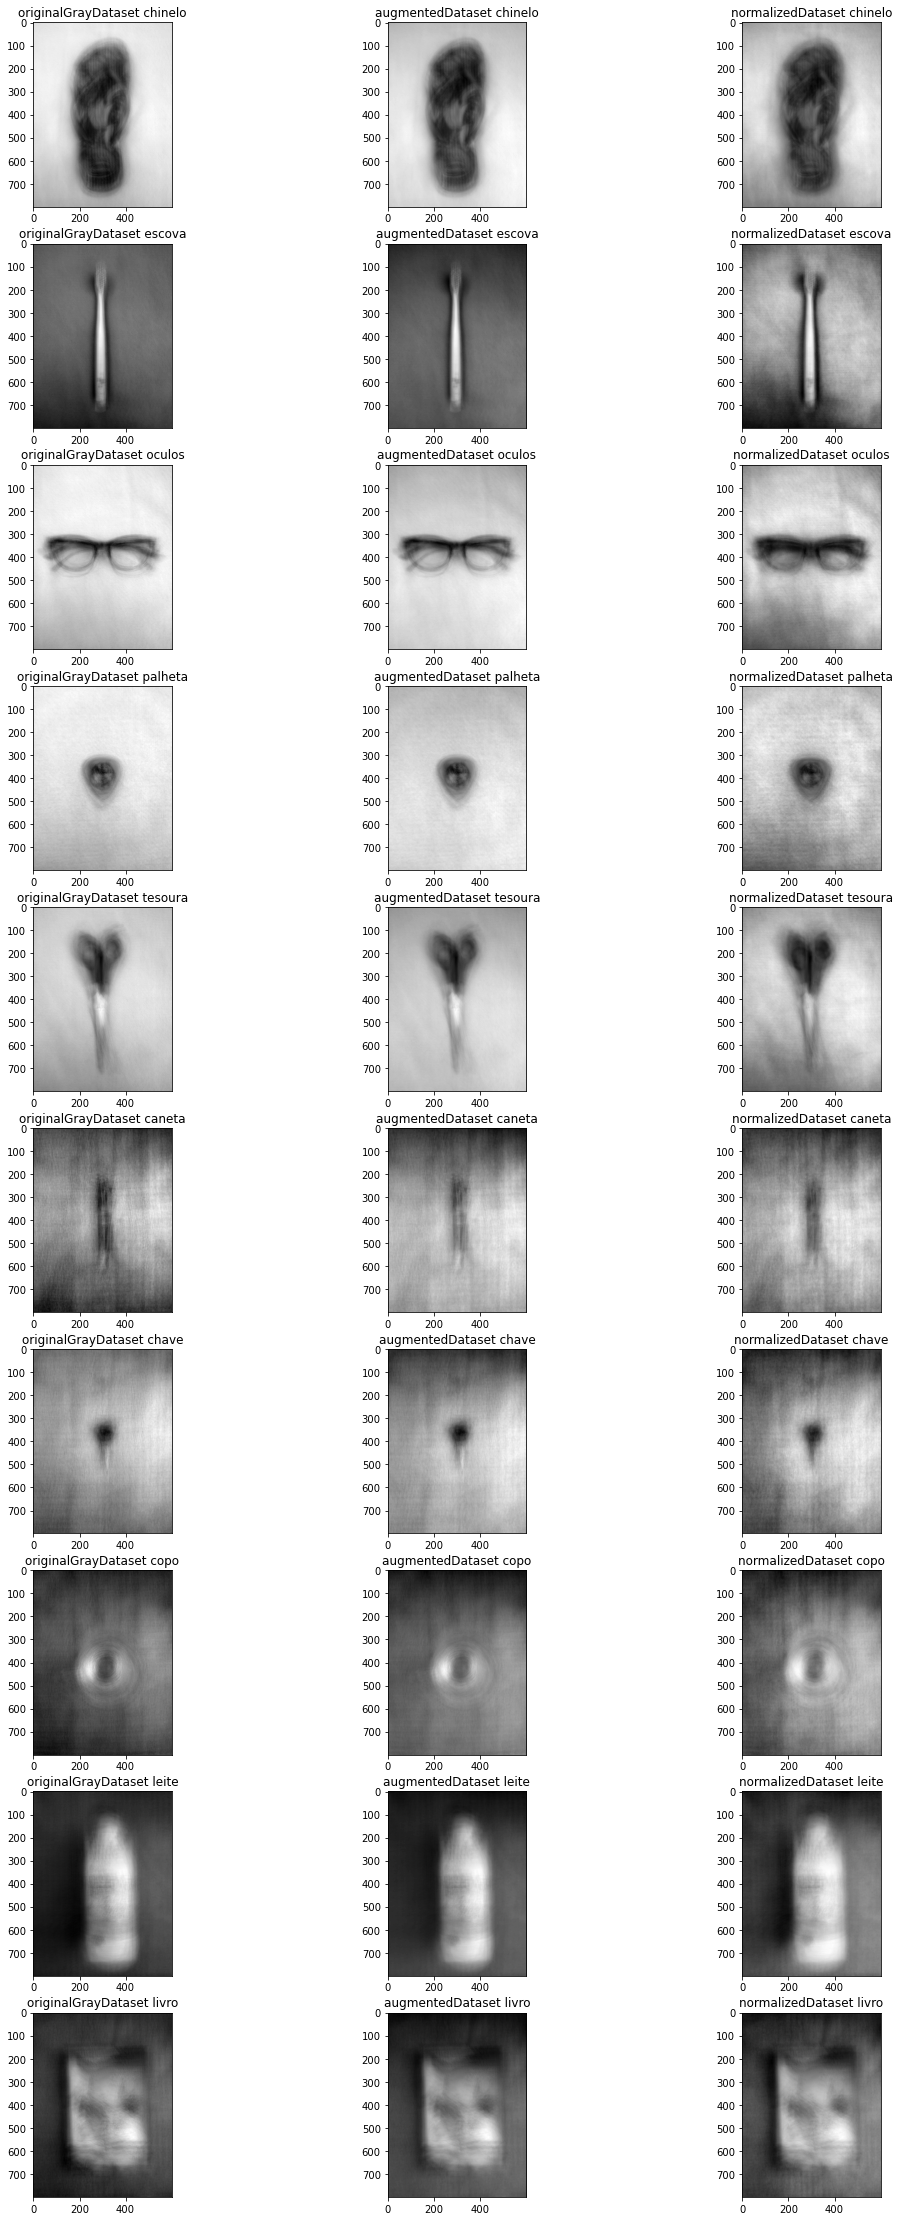

In [127]:
# criar lista com os nomes dos datasets
datasets = ["originalGrayDataset", "augmentedDataset", "normalizedDataset"]

# criar lista com os nomes das classes
classes = ["chinelo", "escova", "oculos", "palheta", "tesoura", "caneta", "chave", "copo", "leite", "livro"]

# definir a figura
fig, ax = plt.subplots(len(classes), len(datasets), figsize=(18, 40))

# calcular o protótipo médio para as imagens de cada classe de cada dataset
for col, dataset in enumerate(datasets):

    for row, classe in enumerate(classes):
        all_paths = glob(f"/Users/gabimelo/Desktop/EP2/{dataset}/*{classe}*.jpg") # selecionar todas as imagens de uma classe de um dataset
        prototype = 0 # criar variável para o protótipo 
        n_img = len(all_paths) # calcular o número de imagens

        for path in all_paths:
            img = io.imread(path) # abrir a imagem
            imgarr = np.array(img) # converter a imagem em np array    
            prototype += imgarr/n_img # adicionar ao protótipo médio
        
        try:
            ax[row,col].imshow(prototype, cmap=plt.get_cmap('gray')) # plotar os protótipos médios de cada classe de cada dataset
#             ax.set_axis_off()
            ax[row,col].set_title(dataset + " " + classe)
        except:
            pass

2. **Histograma médio de cada classe**:

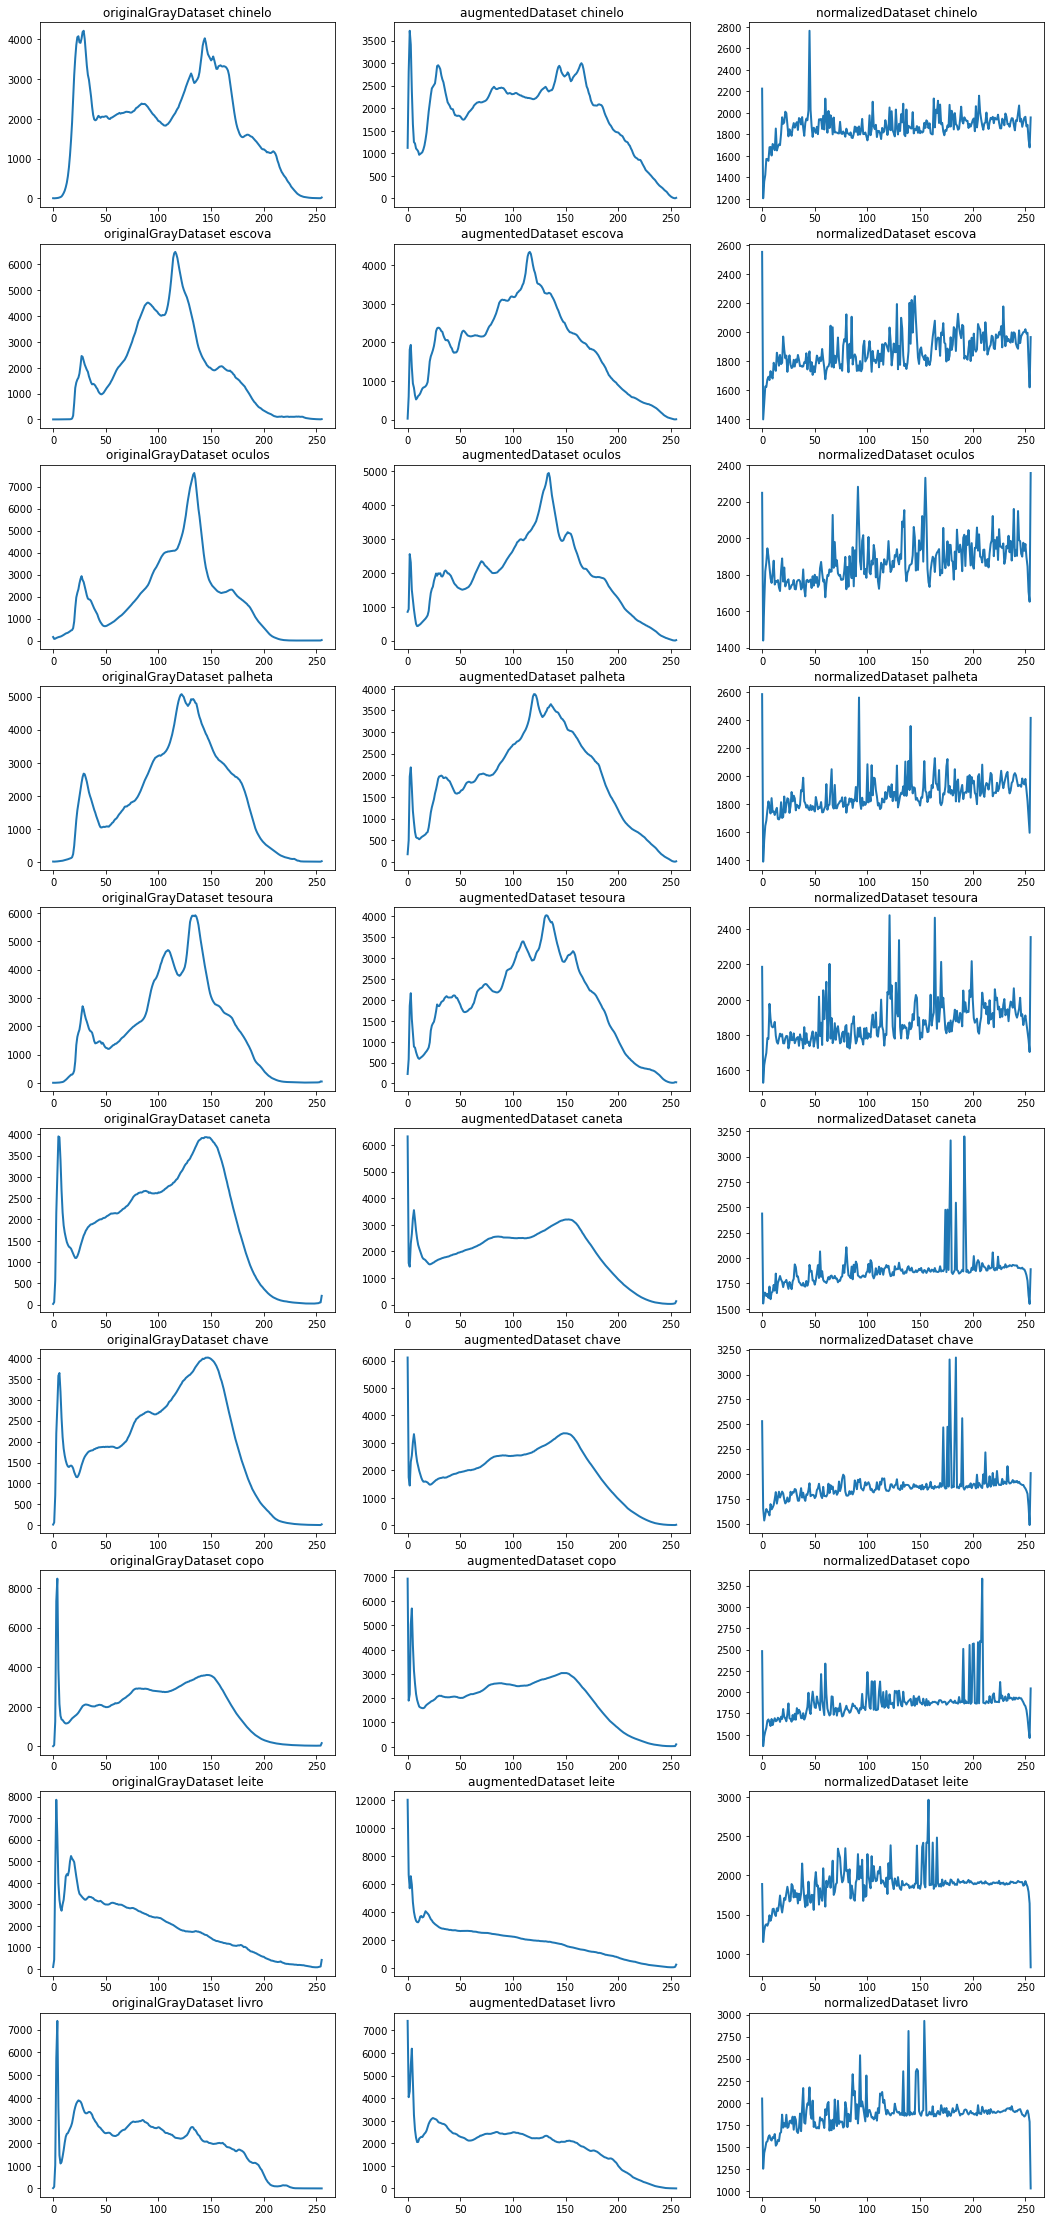

In [128]:
# criar lista com os nomes dos datasets
datasets = ["originalGrayDataset", "augmentedDataset", "normalizedDataset"]

# criar lista com os nomes das classes
classes = ["chinelo", "escova", "oculos", "palheta", "tesoura", "caneta", "chave", "copo", "leite", "livro"]

# definir a figura
fig, ax = plt.subplots(len(classes), len(datasets), figsize=(18, 40))

# calcular o histograma médio das imagens de cada classe de cada dataset
for col, dataset in enumerate(datasets):

    for row, classe in enumerate(classes):

        all_paths = glob(f"/Users/gabimelo/Desktop/EP2/{dataset}/*{classe}*.jpg") # selecionar todas as imagens de uma classe de um dataset
        n_img = len(all_paths) # calcular o número de imagens
        hist_sum = 0 # criar variável para a soma dos histogramas

        for path in all_paths:
            img = io.imread(path) # abrir a imagem
            imgarr = np.array(img) # converter a imagem em np array  
            hist_img, hist_centers = exposure.histogram(img, nbins=256, source_range = 'dtype') # gerar o histograma da imagem
            hist_sum += hist_img # adicionar o histograma da imagem à soma dos histogramas da classe
                    
        try:
            ax[row,col].plot(hist_centers, hist_sum/n_img, lw=2) # plotar os histogramas médios de cada classe de cada dataset
            ax[row,col].set_title(dataset + " " + classe)
        except:
            pass

3. **Variância do histograma de cada classe**:

In [131]:
# criar lista com os nomes dos datasets
datasets = ["originalGrayDataset", "augmentedDataset", "normalizedDataset"]

# criar lista com os nomes das classes
classes = ["chinelo", "escova", "oculos", "palheta", "tesoura", "caneta", "chave", "copo", "leite", "livro"]

var_dict = {} # criar dicionário para as variâncias

# calcular a variância dos histogramas de cada classe de cada dataset
for col, dataset in enumerate(datasets):

    for row, classe in enumerate(classes):
#         hist_sum = 0
        all_paths = glob(f"/Users/gabimelo/Desktop/EP2/{dataset}/*{classe}*.jpg") # selecionar todas as imagens de uma classe de um dataset
        n_img = len(all_paths) # calcular o número de imagens

        for path in all_paths:
            img = io.imread(path) # abrir a imagem
            imgarr = np.array(img) # converter a imagem em np array  
            hist_img, hist_centers = exposure.histogram(img, nbins=256, source_range = 'dtype') # gerar o histograma da imagem         
            hist_sum += hist_img # adicionar o histograma da imagem à soma dos histogramas da classe
                  
        hist_avg = (hist_centers*hist_sum).sum() / hist_sum.sum() # calcular a média do histograma
        hist_var = (( (hist_centers - hist_avg)**2) * hist_sum ).sum() / (hist_sum.sum()-1) # calcular a variância do histograma
 
        var_dict[(dataset, classe)] = hist_var # adicionar a variância associada a cada dataset/classe no dicionário

pd.DataFrame(var_dict, index = [0]).stack() # visualizar tabela com as variâncias

augmentedDataset  normalizedDataset  originalGrayDataset
0 caneta        3290.893354        4174.906017          3699.674144
  chave         3291.250330        4246.148404          3625.835641
  chinelo       3681.631621        3613.331453          4963.237013
  copo          3303.775597        4309.678854          3581.700741
  escova        3505.912358        3762.629175          4538.882685
  leite         3400.965013        4357.994557          3655.602569
  livro         3440.215599        4404.306090          3651.597278
  oculos        3407.971894        3889.830137          4222.363441
  palheta       3344.098690        3998.950245          3981.418843
  tesoura       3280.224160        4094.409346          3775.606254